In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# Import the API key.
from config import weather_api_key

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

marystown ca
balakliya ua
makakilo city us
ushuaia ar
taolanaro mg
tari pg
avarua ck
bambous virieux mu
coleraine gb
port alfred za
atuona pf
bluff nz
vaini to
vaini to
kapaa us
barrow us
hilo us
broome au
alugan ph
rikitea pf
huilong cn
hermanus za
barrow us
bambous virieux mu
busselton au
ushuaia ar
pochutla mx
deputatskiy ru
stoughton us
new norfolk au
busselton au
tuatapere nz
saurimo ao
puerto ayora ec
mandalgovi mn
khatanga ru
saskylakh ru
lebu cl
acolla pe
san patricio mx
carnarvon au
busselton au
ushuaia ar
qaanaaq gl
rikitea pf
anloga gh
mananjary mg
bredasdorp za
pochutla mx
atuona pf
talnakh ru
avarua ck
kysyl-syr ru
mar del plata ar
port elizabeth za
kidal ml
jamestown sh
puerto ayora ec
limoux fr
kjopsvik no
surt ly
hilo us
vaini to
hithadhoo mv
anadyr ru
faanui pf
hithadhoo mv
ilulissat gl
margate za
cascais pt
arraial do cabo br
hermanus za
chuy uy
ushuaia ar
kaitangata nz
new norfolk au
beringovskiy ru
upernavik gl
ferrol es
faanui pf
puerto ayora ec
roma au
atuona pf
s

vila franca do campo pt
mrirt ma
tuktoyaktuk ca
iqaluit ca
smithers ca
port hardy ca
bluff nz
rikitea pf
umzimvubu za
rikitea pf
vaini to
isangel vu
jamestown sh
narsaq gl
mataura pf
leningradskiy ru
lebu cl
ostrovnoy ru
clyde river ca
maragogi br
kyren ru
lulea se
mogadishu so
araouane ml
puerto ayora ec
mar del plata ar
jamestown sh
taolanaro mg
bria cf
taolanaro mg
thompson ca
portland au
severo-kurilsk ru
taolanaro mg
hobart au
razole in
hobart au
hermanus za
chuy uy
illoqqortoormiut gl
taolanaro mg
kruisfontein za
busselton au
kapaa us
belushya guba ru
frontera mx
novobirilyussy ru
chuy uy
lavrentiya ru
port alfred za
belushya guba ru
busselton au
saint-remy-de-provence fr
new norfolk au
acarau br
barrow us
busselton au
bredasdorp za
airai pw
misratah ly
barrow us
safwah sa
lodja cd
norman wells ca
kruisfontein za
busselton au
ushuaia ar
ushuaia ar
kapaa us
oistins bb
cabo san lucas mx
albany au
nantucket us
port elizabeth za
cape town za
tautira pf
kharsia in
hobart au
gonbad-e q

chuy uy
kapaa us
mukhen ru
provideniya ru
maceio br
anloga gh
axim gh
tasiilaq gl
barentsburg sj
ouallam ne
liniere ca
skala fourkas gr
mataura pf
ushuaia ar
leningradskiy ru
porkhov ru
berlevag no
tautira pf
kouango cf
iqaluit ca
ushuaia ar
debre sina et
mazamari pe
bluff nz
codrington ag
punta arenas cl
puerto ayora ec
kapaa us
albany au
nanortalik gl
port alfred za
nyaunglebin mm
panaba mx
ancud cl
bathsheba bb
flinders au
port alfred za
punta arenas cl
vardo no
yellowknife ca
nizhneyansk ru
vaini to
thompson ca
bredasdorp za
arlit ne
kavaratti in
cape town za
attawapiskat ca
avarua ck
rikitea pf
baiao br
buckeye us
rikitea pf
visby se
kodiak us
mataura pf
pevek ru
urubicha bo
albany au
thompson ca
rikitea pf
ceres za
illoqqortoormiut gl
kavieng pg
atuona pf
petropavlovsk-kamchatskiy ru
evensk ru
ushuaia ar
vanavara ru
ushuaia ar
taolanaro mg
mataura pf
taoudenni ml
hermanus za
yellowknife ca
ushuaia ar
saleaula ws
dekalb us
bilma ne
bend us
tiksi ru
saint george bm
illoqqortoormiut

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

761

In [ ]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_description = city_weather["weather"][0]["description"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Country": city_country,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Current Description": city_description})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | marystown
Processing Record 2 of Set 1 | balakliya
Processing Record 3 of Set 1 | makakilo city
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | tari
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | bambous virieux
Processing Record 9 of Set 1 | coleraine
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | barrow
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | broome
Processing Record 18 of Set 1 | alugan
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | huilong
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | busselton
Processing Record 23 of Set 1

Processing Record 32 of Set 4 | grand gaube
Processing Record 33 of Set 4 | rio branco do sul
Processing Record 34 of Set 4 | saint-francois
Processing Record 35 of Set 4 | sakakah
Processing Record 36 of Set 4 | ixtapa
Processing Record 37 of Set 4 | joshimath
Processing Record 38 of Set 4 | tautira
Processing Record 39 of Set 4 | opobo
City not found. Skipping...
Processing Record 40 of Set 4 | batemans bay
Processing Record 41 of Set 4 | sao jose da coroa grande
Processing Record 42 of Set 4 | stokmarknes
Processing Record 43 of Set 4 | hobyo
Processing Record 44 of Set 4 | lolua
City not found. Skipping...
Processing Record 45 of Set 4 | vila franca do campo
Processing Record 46 of Set 4 | morant bay
Processing Record 47 of Set 4 | praia
Processing Record 48 of Set 4 | duku
Processing Record 49 of Set 4 | san policarpo
Processing Record 50 of Set 4 | sur
Processing Record 1 of Set 5 | kerrville
Processing Record 2 of Set 5 | axim
Processing Record 3 of Set 5 | tiksi
Processing Reco

Processing Record 23 of Set 8 | frontera
Processing Record 24 of Set 8 | novobirilyussy
Processing Record 25 of Set 8 | saint-remy-de-provence
Processing Record 26 of Set 8 | acarau
Processing Record 27 of Set 8 | misratah
Processing Record 28 of Set 8 | safwah
City not found. Skipping...
Processing Record 29 of Set 8 | lodja
Processing Record 30 of Set 8 | norman wells
Processing Record 31 of Set 8 | oistins
Processing Record 32 of Set 8 | nantucket
Processing Record 33 of Set 8 | kharsia
Processing Record 34 of Set 8 | gonbad-e qabus
Processing Record 35 of Set 8 | uusikaupunki
Processing Record 36 of Set 8 | vetluga
Processing Record 37 of Set 8 | aykhal
Processing Record 38 of Set 8 | cockburn town
Processing Record 39 of Set 8 | kirksville
Processing Record 40 of Set 8 | mudgee
Processing Record 41 of Set 8 | kudahuvadhoo
Processing Record 42 of Set 8 | saravan
Processing Record 43 of Set 8 | uyuni
Processing Record 44 of Set 8 | port hawkesbury
Processing Record 45 of Set 8 | twe

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description
0,Marystown,CA,47.1666,-55.1483,51.73,57,93,11.88,overcast clouds
1,Balakliya,UA,49.4627,36.8595,57.00,68,97,6.87,overcast clouds
2,Makakilo City,US,21.3469,-158.0858,74.19,77,100,0.00,overcast clouds
3,Ushuaia,AR,-54.8000,-68.3000,43.21,98,100,3.69,light rain
4,Tari,NG,12.4086,4.4914,104.99,20,55,4.68,broken clouds
5,Avarua,CK,-21.2078,-159.7750,80.65,94,75,5.75,broken clouds
6,Bambous Virieux,MU,-20.3428,57.7575,73.65,78,40,4.61,scattered clouds
7,Coleraine,GB,55.1333,-6.6667,58.91,75,100,15.39,overcast clouds
8,Port Alfred,ZA,-33.5906,26.8910,59.18,88,13,3.00,few clouds
9,Atuona,PF,-9.8000,-139.0333,78.30,66,60,21.30,broken clouds


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1652464797.442999

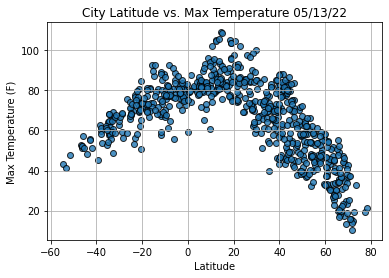

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

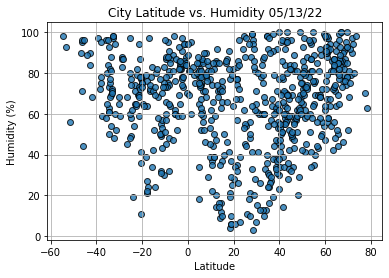

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

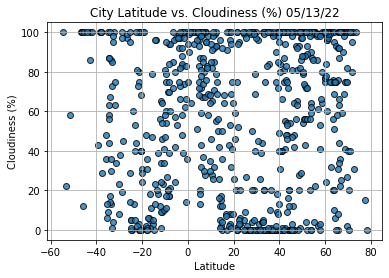

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

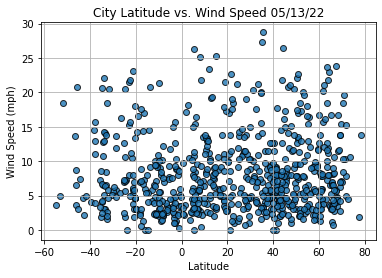

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_1236/755688848.py, line 3)

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description
0,Marystown,CA,47.1666,-55.1483,51.73,57,93,11.88,overcast clouds
1,Balakliya,UA,49.4627,36.8595,57.00,68,97,6.87,overcast clouds
2,Makakilo City,US,21.3469,-158.0858,74.19,77,100,0.00,overcast clouds
4,Tari,NG,12.4086,4.4914,104.99,20,55,4.68,broken clouds
7,Coleraine,GB,55.1333,-6.6667,58.91,75,100,15.39,overcast clouds
...,...,...,...,...,...,...,...,...,...
695,Arkhara,RU,49.4212,130.0842,39.72,75,29,4.54,scattered clouds
696,Qom,IR,34.6401,50.8764,64.42,36,83,19.91,broken clouds
697,Abu Dhabi,AE,24.4667,54.3667,84.31,53,0,9.22,clear sky
698,Santander,ES,43.4647,-3.8044,62.71,95,75,5.99,broken clouds


In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description
0,Marystown,CA,47.1666,-55.1483,51.73,57,93,11.88,overcast clouds
1,Balakliya,UA,49.4627,36.8595,57.00,68,97,6.87,overcast clouds
2,Makakilo City,US,21.3469,-158.0858,74.19,77,100,0.00,overcast clouds
4,Tari,NG,12.4086,4.4914,104.99,20,55,4.68,broken clouds
7,Coleraine,GB,55.1333,-6.6667,58.91,75,100,15.39,overcast clouds


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

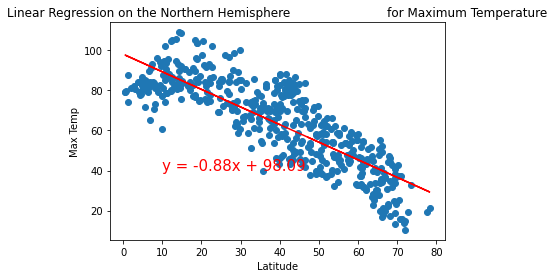

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

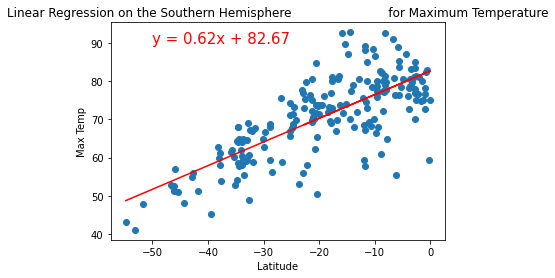

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

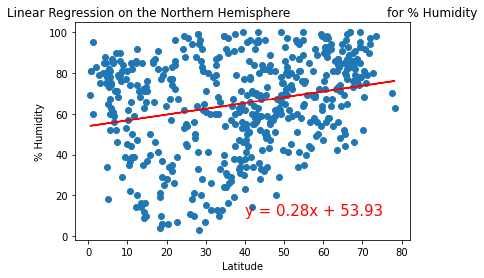

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

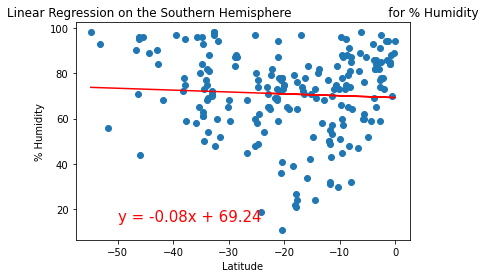

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

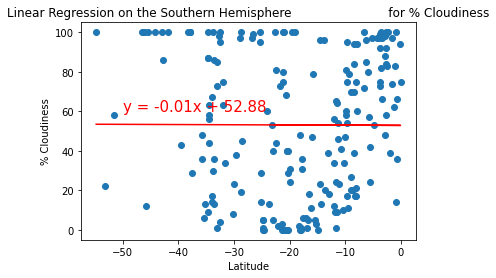

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

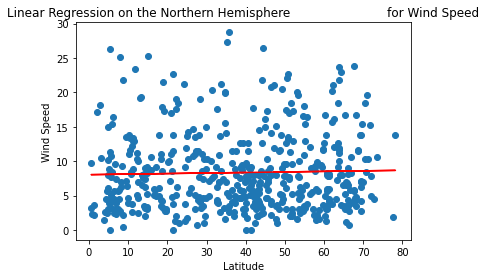

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

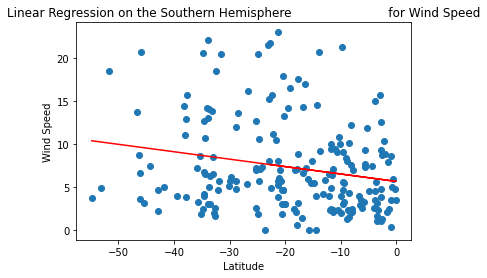

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))